In [1]:
from classes.basic_optical_gating import BasicOpticalGating as BOG, BasicOpticalGatingPlotter as BOGP, Logger
from classes.drawer import Drawer

In [2]:
import copy
import numpy as np
import matplotlib.pyplot as plt

# Real data
## Run optical gating

In [3]:
sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
reference_sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
reference_sequence_period = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.txt"

og = BOG()
og.logger.set_quiet()
og.set_sequence(sequence)
og.set_reference_sequence(reference_sequence)
og.set_reference_period(reference_sequence_period)
og.run(bias_correct=False)


In [4]:
def adapted_v(x, I_1, I_2, x_n, c):
    return np.abs(I_1 * (x - x_n) + 0.5 * I_2 * (x**2 - x_n**2)) + c

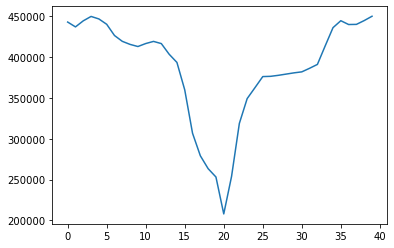

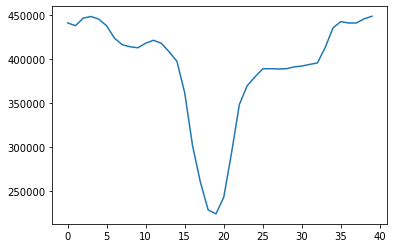

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

In [5]:
frame = 311

plt.plot(og.sads[frame])
plt.show()

frame = 310

plt.plot(og.sads[frame])
plt.show()
minima = np.argmin(og.sads[frame][2:-2]) + 2

from scipy.optimize import curve_fit



popt, pcov = curve_fit(adapted_v, np.linspace(minima - 5, minima + 6, 11), og.sads[frame][minima - 5:minima + 6], maxfev = 1000)
plt.plot(np.linspace(minima - 5, minima + 6, 11), og.sads[frame][minima - 5:minima + 6])
plt.plot(np.linspace(minima - 5, minima + 6, 50), adapted_v(np.linspace(minima - 5, minima + 6, 50), *popt))
plt.show()
